# Model exploration

Ideally I'd like to develop a regression model to get an estimate for enterococci and E. coli amount in
the water given current (and past few days) weather data. Classification of bad and good water quality
might be an easier task for starters. For that I could also utilise the measurements from other beaches
than Pikkukoski as the water quality some what correlates with beaches upstream. 

First I think I'll try to use logistic regression as a baseline to try to see if with cross validation we
can get some result.

Then I think I'll just try linear regression with lag features for rain, and do it for both enterococci
and E. coli. I won't use other beaches for training for this task as it seems there's some discrepancy
between the measurements even during the same day for different beaches. Because of how the the bad
quality is defined we can just use the original thresholds for bad water quality given the predicted
E. coli and enterococci amounts.

In [31]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from load_dataset import load_dataset, get_filenames, get_measurement_files_pikkukoski, load_features_for_rain, get_weather_file_names_for_year

weather_files, measurement_files = get_filenames()

X, Y = load_dataset(weather_files, measurement_files)

In [2]:
y_quality_pikkukoski = Y[["quality_pikkukoski"]]

In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y_quality_pikkukoski)

print(model.predict_proba(X))

[[6.53599185e-03 9.93464008e-01]
 [2.51902147e-03 9.97480979e-01]
 [9.62075329e-01 3.79246713e-02]
 [2.51902147e-03 9.97480979e-01]
 [2.61876407e-03 9.97381236e-01]
 [2.24336006e-03 9.97756640e-01]
 [1.29434293e-02 9.87056571e-01]
 [9.99997114e-01 2.88611118e-06]
 [9.99998009e-01 1.99129483e-06]
 [9.68045119e-01 3.19548806e-02]
 [2.51902147e-03 9.97480979e-01]
 [2.51902147e-03 9.97480979e-01]
 [4.01783219e-03 9.95982168e-01]
 [5.34637442e-03 9.94653626e-01]
 [2.51902147e-03 9.97480979e-01]
 [9.76603500e-01 2.33965002e-02]
 [2.56651413e-02 9.74334859e-01]
 [1.91912993e-02 9.80808701e-01]
 [2.30880391e-03 9.97691196e-01]]


/Users/laurisaikkonen/code/pikkukoski-analysis/env/lib/python3.12/site-packages/sklearn/utils/validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [4]:
from sklearn.model_selection import cross_val_score
print(y_quality_pikkukoski.shape)
print(cross_val_score(LogisticRegression(), X, y_quality_pikkukoski.values.ravel(), cv=3))
print(cross_val_score(LogisticRegression(), X[["kumpula_rain_lag2", "helsinki-vantaa_rain_lag1", "kumpula_rain_rolling_sum10"]], y_quality_pikkukoski.values.ravel(), cv=3))

(19, 1)
[0.85714286 1.         0.66666667]
[1.         1.         0.66666667]


In [5]:
from sklearn.linear_model import LinearRegression

features = ["kumpula_rain_now", "kumpula_rain_lag1", "kumpula_rain_lag2", "helsinki-vantaa_rain_lag1", "helsinki-vantaa_rain_lag2", "kumpula_rain_rolling_sum10", "helsinki-vantaa_rain_rolling_sum10"]
features = ["kumpula_rain_lag1", "kumpula_rain_lag2", "kumpula_rain_lag3", "helsinki-vantaa_rain_lag1", "helsinki-vantaa_rain_lag2", "helsinki-vantaa_rain_lag3", "kumpula_rain_rolling_sum10", "helsinki-vantaa_rain_rolling_sum10"]

print("Logistic regression prediction cross validation")
print(cross_val_score(LogisticRegression(), X[features], y_quality_pikkukoski.values.ravel(), cv=5))

print("Linear regression prediction cross validation")
print(cross_val_score(LinearRegression(), X, Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1", "kumpula_rain_rolling_sum10"]], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1", "kumpula_rain_rolling_sum10"]], Y[["enterococci_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1"]], Y[["enterococci_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[["kumpula_rain_now", "helsinki-vantaa_rain_lag1"]], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))
print(cross_val_score(LinearRegression(), X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=5))

model = LinearRegression()


model.fit(X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]])
print("------")
print(X[features].values)
print(model.predict(X[features]))
print(Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]].values)

Logistic regression prediction cross validation
[1.         0.75       1.         0.75       0.66666667]
Linear regression prediction cross validation
[-9.94026373e-02 -1.28039983e+09 -1.59740658e+03]
[ 0.41818721 -0.52982107 -4.68115763]
[ 0.35293486 -0.21384258 -0.53455486]
[ 0.55464784 -0.27129853 -0.28510182]
[ 0.60440019 -0.55458229 -1.36898502]
[-70.11751304  -0.60042489   0.69515281 -31.10223097 -40.8570536 ]
------
[[7.500e-01 0.000e+00 0.000e+00 1.210e+00 0.000e+00 0.000e+00 1.010e+00
  1.460e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]
 [1.110e+01 0.000e+00 0.000e+00 6.490e+00 0.000e+00 0.000e+00 1.110e+01
  6.490e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.800e-01
  1.300e-01]
 [0.000e+00 0.000e+00 3.880e+00 0.000e+00 0.000e+00 5.140e+00 2.685e+01
  2.042e+01]
 [0.000e+00 0.000e+00 7.700e-01 0.000e+00 1.110e+00 1.000e-01 1

In [6]:
from sklearn.linear_model import Lasso

print(cross_val_score(Lasso(alpha=15.0), X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))

model = Lasso(alpha=15.0)

model.fit(X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]])
print("------")
print(model.predict(X[features]))
print(Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]].values)

[ 0.43709721  0.37269269 -3.04938252]
------
[[ 152.04408809  120.07826578]
 [  93.71012655   12.89684774]
 [ 713.98129852 1567.31020936]
 [  93.71012655   12.89684774]
 [  92.86193288   13.17091252]
 [ 217.48796842  100.23017172]
 [  57.36860638   53.24921285]
 [ 913.78889433 1662.14289807]
 [ 768.20490158 1097.51408302]
 [ 244.98491833  329.05417282]
 [  93.71012655   12.89684774]
 [  93.71012655   12.89684774]
 [  98.25337588   96.75175948]
 [  78.02599652   62.91309471]
 [  93.71012655   12.89684774]
 [ 433.36371836  209.52427887]
 [  39.05126767   22.15180446]
 [  59.60959645   47.36576399]
 [  95.42280386   16.05913364]]
[[  20.   44.]
 [  90.   35.]
 [ 720. 1600.]
 [ 210.   61.]
 [  21.   23.]
 [ 100.  110.]
 [  45.   44.]
 [ 880. 1700.]
 [ 800. 1100.]
 [ 510.  180.]
 [ 190.   83.]
 [ 110.   23.]
 [  40.   25.]
 [  50.   34.]
 [  60.   17.]
 [ 480.  220.]
 [  27.   49.]
 [  50.   64.]
 [  30.   50.]]


# Results thus far

Seems using all features makes linear regression prediction overfit. With some experimentation the best
features seem to be current rain (within 12h) in kumpula and previous 12h rain (lag1) in helsinki-vantaa

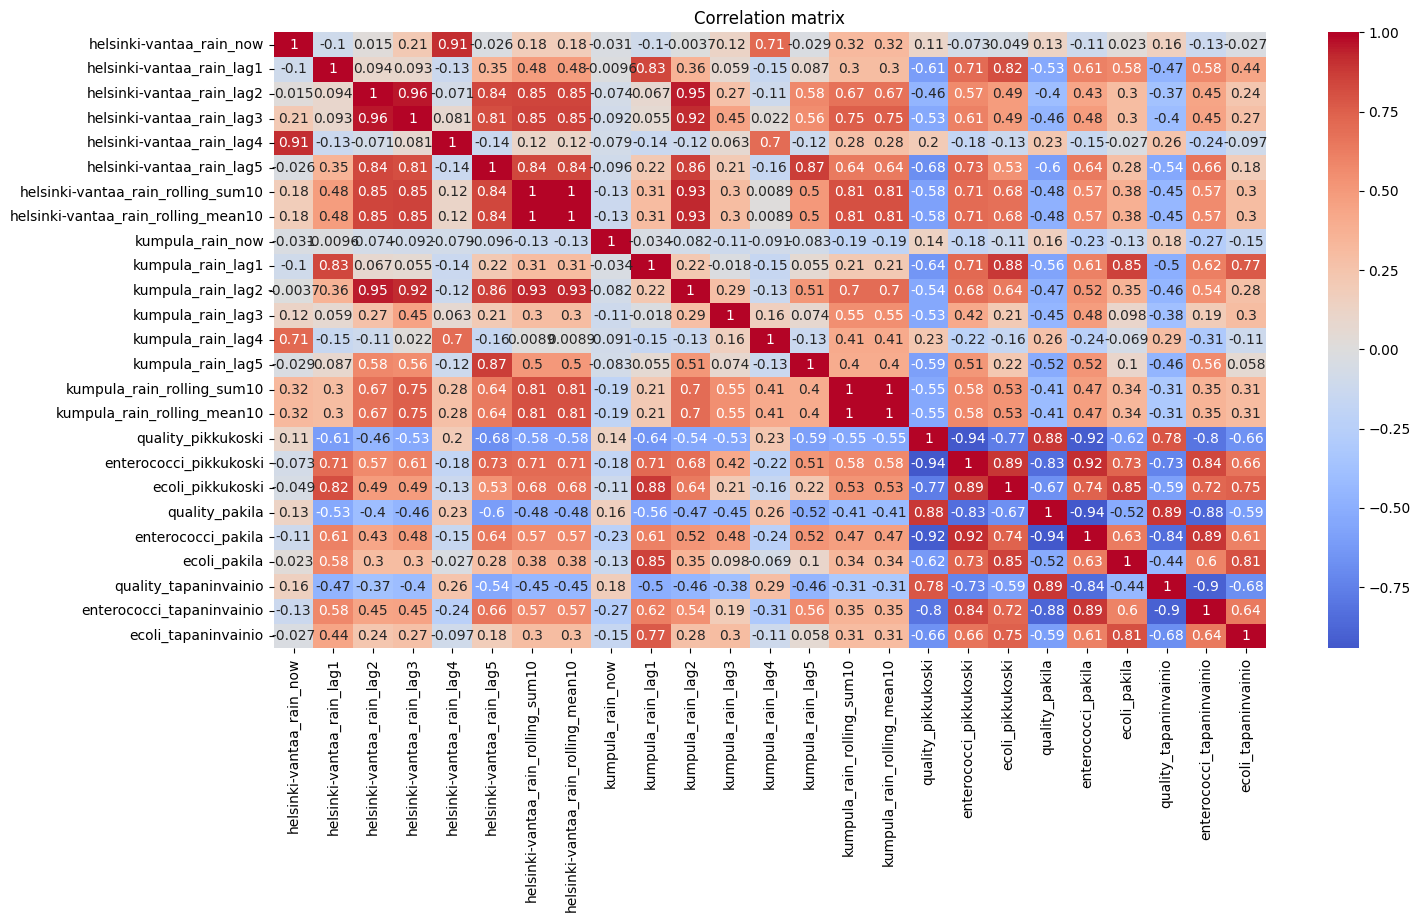

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Build a correlation matrix of features
df = pd.merge(X, Y, on="date")
corr_matrix = df.corr()

plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation matrix")
plt.show()


# Interpretation of correlation matrix

A negative correlation between quality (1 = good, 0 = bad, more rain -> worse result) and rain makes sense.
Seems there is an expected correlation between kumpula rain lags 1, 2, 3 (12h, 24h and 36h ago respectively).
However for the current rain (`*_rain_now`) and rain 48h ago (`*_rain_lag4`) there exists an interesting
correlation between the quality and rain amount as it isn't the same as for other more expected lags.

The strange and minor correlation between rain now and the quality shouldn't be too surprising as if there
is currently rain there might not be enough time to overflow the wastewater systems. However, the abnormal
relation between lag 4 and quality is more surprising and I don't personally have any idea what could cause
it.

The rolling mean and rolling sum having the exact same correlation with other variables makes sense as the
only difference between them is scale. Having the mean or sum as part of the final features makes sense to me
as it encompasses a longer timeframe than any other of the features.

# Trying shorter resampling period

My hypothesis is that shortening the resampling period does not positively affect the prediction but makes it more prone to overfitting.
Also let's try only using Pikkukoski data. Previously we only used water quality measurements for which there is a measurement for all
the tracked beaches (because of how the loading of the dataset works). Now we have much more data points and we see that even the rain
currently correlates in a sensible way slightly with the water quality. The correlation is almost non-existent though for the rain now.



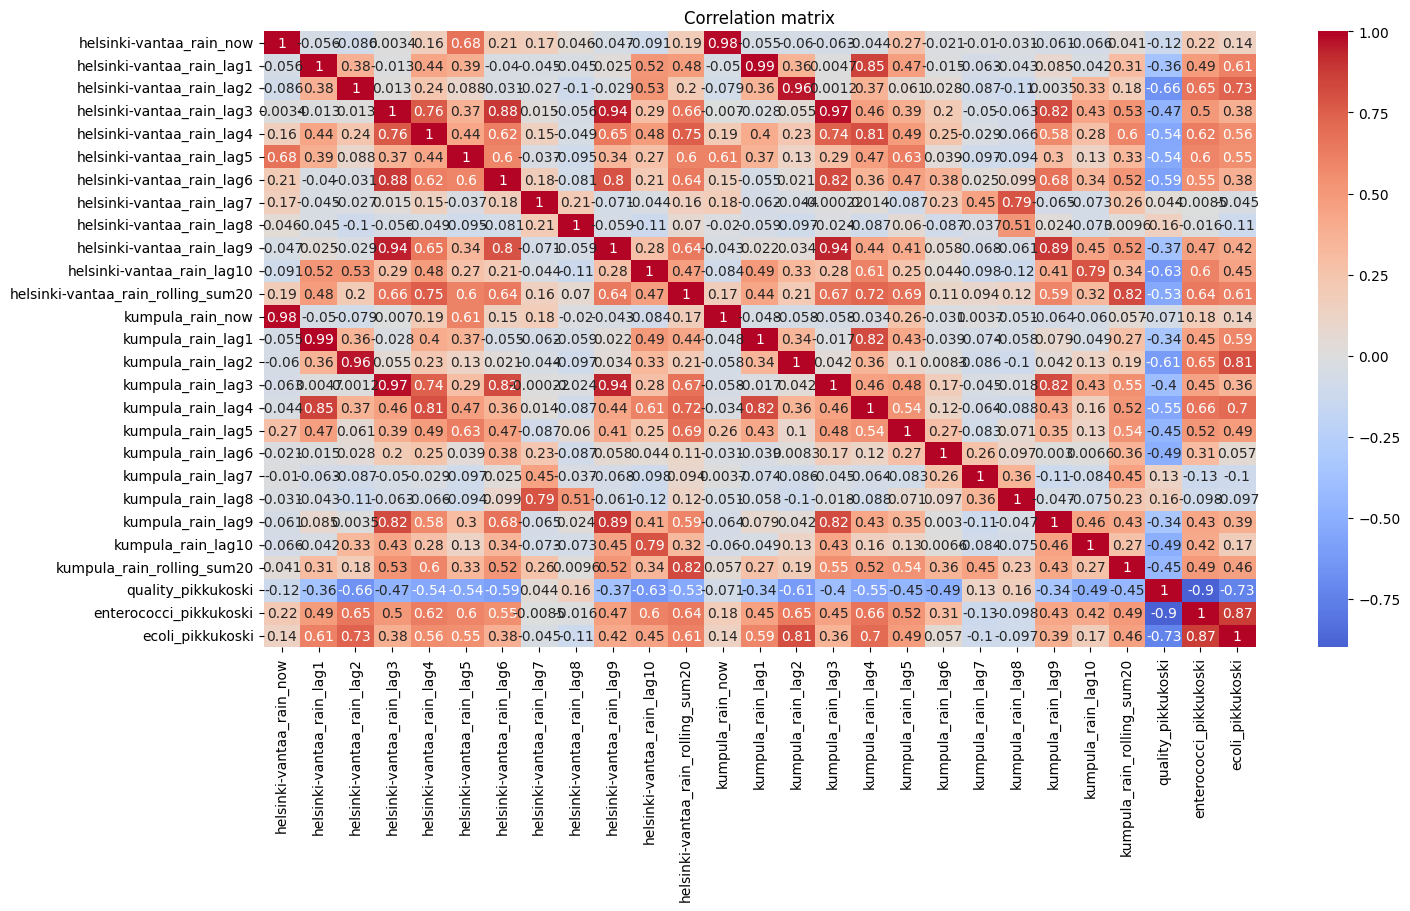

In [8]:
def try_shorter_resampling_for_rain():
  weather_files, _ = get_filenames()
  measurement_files = get_measurement_files_pikkukoski()

  X, Y = load_dataset(weather_files, measurement_files, "6h", 10, 20)

  # Build a correlation matrix of features
  df = pd.merge(X, Y, on="date")
  features = [col for col in df if "rain_lag" in col or "now" in col or "sum" in col or "pikkukoski" in col]
  df = df[features]
  corr_matrix = df.corr()

  plt.figure(figsize=(16, 8))
  sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
  plt.title("Correlation matrix")
  plt.show()
  

try_shorter_resampling_for_rain()

Seems that rain from lag1 to lag6 correlates expectedly with water quality. I'm going to be using those features with the rolling sum.

In [73]:
from sklearn.linear_model import Ridge

def plot_rain_and_predicted_values(time_index: pd.Index, rain: pd.Series, predicted_enterococci: np.ndarray, predicted_ecoli: np.ndarray):
  fig, ax1 = plt.subplots(figsize=(10, 6))
  ax1.plot(time_index, rain, label="rain kumpula", color="red")
  ax1.set_xlabel("Date")
  ax1.set_ylabel("Rain (mm)")

  ax2 = ax1.twinx()

  ax2.plot(time_index, predicted_enterococci, label="enterococci predicted")
  ax2.plot(time_index, predicted_ecoli, label="ecoli predicted")

  ax2.set_ylabel("Bacteria (pmy/100ml)")

  lines_1, labels_1 = ax1.get_legend_handles_labels()
  lines_2, labels_2 = ax2.get_legend_handles_labels()
  ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")
  plt.title("Rain and predicted bacteria")
  plt.show()

def model_for_pikkukoski_lasso():
  weather_files, _ = get_filenames()
  measurement_files = get_measurement_files_pikkukoski()

  X, Y = load_dataset(weather_files, measurement_files, "6h", 10, 20)

  lag_features = [col for col in X if any(l in col for l in [f"lag{x}" for x in range(1, 7)])]
  other_features = [col for col in X if "now" in col or"sum" in col]
  features = lag_features + other_features
  X = X[features]

  print(cross_val_score(Lasso(alpha=15.0), X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))

  model = Lasso(alpha=15.0)

  model.fit(X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]])
  print("------")
  #print(model.predict(X[features]))
  #print(Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]].values)

  X_all = load_features_for_rain(get_weather_file_names_for_year("2024"), "6h", 10, 20)
  X_all = X_all[features]
  X_all.fillna(0, inplace=True)
  #print(X_all)
  predicted = model.predict(X_all)
  #print(predicted.shape)
  #print(predicted)
  plot_rain_and_predicted_values(X_all.index, X_all["kumpula_rain_now"], predicted.T[0], predicted.T[1])

def model_for_pikkukoski_ridge():
  weather_files, _ = get_filenames()
  measurement_files = get_measurement_files_pikkukoski()

  X, Y = load_dataset(weather_files, measurement_files, "6h", 10, 20)

  lag_features = [col for col in X if any(l in col for l in [f"lag{x}" for x in range(1, 7)])]
  other_features = [col for col in X if "now" in col or"sum" in col]
  features = lag_features + other_features
  X = X[features]

  print(cross_val_score(Ridge(alpha=20.0), X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]], cv=3))

  model = Ridge(alpha=20.0)

  model.fit(X[features], Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]])
  print("------")
  #print(model.predict(X[features]))
  #print(Y[["enterococci_pikkukoski", "ecoli_pikkukoski"]].values)

  X_all = load_features_for_rain(get_weather_file_names_for_year("2024"), "6h", 10, 20)
  X_all = X_all[features]
  X_all.fillna(0, inplace=True)
  #print(X_all)
  predicted = model.predict(X_all)
  #print(predicted.shape)
  #print(predicted)
  plot_rain_and_predicted_values(X_all.index, X_all["kumpula_rain_now"], predicted.T[0], predicted.T[1])

[-0.0574311  -1.536594   -0.12676406]
------


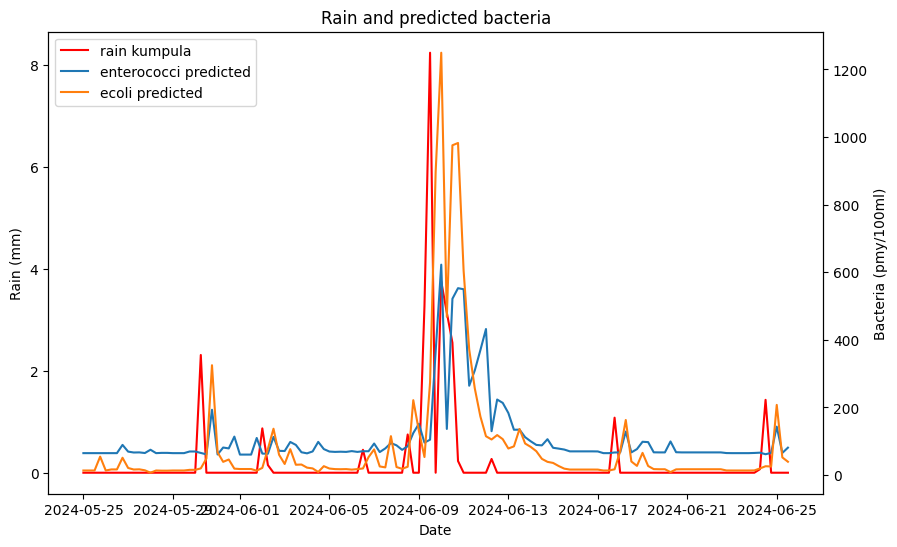

In [74]:
model_for_pikkukoski_lasso()

[ 0.22112179 -0.28105895  0.05076741]
------


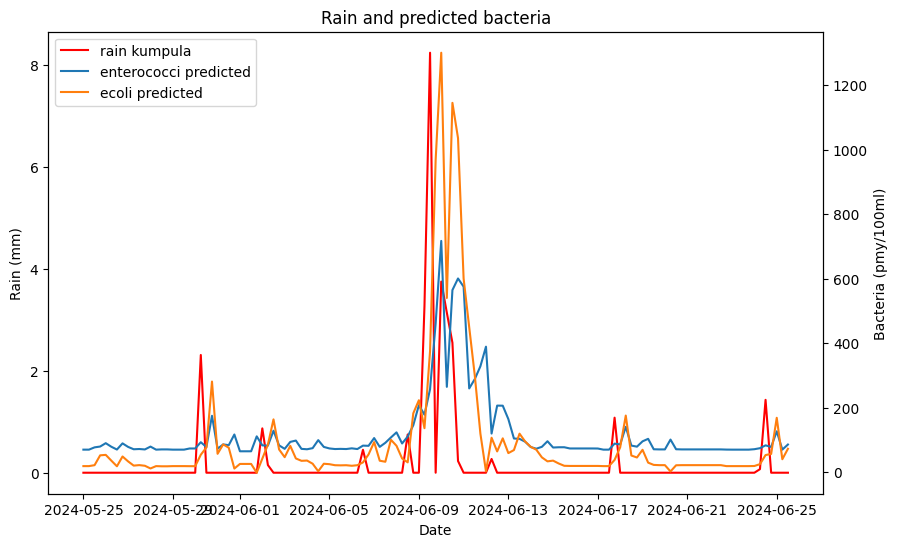

In [75]:
model_for_pikkukoski_ridge()